In [31]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import deqmodel
import basemodel
import repeatedmodel
from generate_data import generate_test_data, decoder, generate_biased_data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
data = generate_test_data()
mydataloader = DataLoader(data, batch_size=len(data))
for feats, labels in mydataloader:
    X = feats.to(device).float()
    y = labels.to(device).float()

In [4]:
base_state = torch.load('basemodel_exp2.pth')
base = basemodel.NeuralNetwork().to(basemodel.device)
base.load_state_dict(base_state)
base.eval()
with torch.no_grad():
    pred, hidden = base(X)

In [5]:
bool_arr = pred > 0
prediction = torch.Tensor([1 if x else 0 for x in bool_arr]).to(device)


In [10]:
def stats(X, y, pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    fp_expr, fn_expr = [], []
    for i in range(len(y)):
        if pred[i] == 1:
            if pred[i] == y[i]:
                tp += 1
            else:
                fp += 1
                fp_expr.append(decoder(X[i]))
        else:
            if pred[i] == y[i]:
                tn += 1
            else:
                fn += 1
                fn_expr.append(decoder(X[i]))
    cf_matrix = np.array([[tn, fp], [fn, tp]])
    return cf_matrix, fp_expr, fn_expr

In [23]:
def getStats(modeltype, data):
    
    mydataloader = DataLoader(data, batch_size=len(data))
    for feats, labels in mydataloader:
        X = feats.to(device).float()
        y = labels.to(device).float()
    name = modeltype.__name__
    state = torch.load(f"{name}_exp2.pth")
    if 'basemodel' in name:
        print('this works')
        model = basemodel.NeuralNetwork().to(modeltype.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred, hidden = model(X)
    elif 'repeatedmodel' in name:
        model = repeatedmodel.NeuralNetwork().to(modeltype.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred, hidden = model(X)
    elif 'deqmodel' in name:
        model = deqmodel.NeuralNetwork().to(modeltype.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred = model(X)
        
               
    bool_arr = pred > 0
    prediction = torch.Tensor([1 if x else 0 for x in bool_arr]).to(device)
    return stats(X,y, prediction)

In [26]:
# cf_matrix, fpx, fnx = getStats(repeatedmodel, data)
cf_matrix1, fpx1, fnx1 = getStats(basemodel, data)
cf_matrix2, fpx2, fnx2 = getStats(deqmodel, data)

this works


In [49]:
fpx2

['(((((4-5))))+1-2+(9-4+8)-3-6-3)',
 '6+9+2+5-8+(1-6-(1-6))+4+8-9-9-8',
 '(((4+6-5+1-(2-7-(((2-9-4)))))))',
 '6-(((((((((1-2+(6+5-1))))))))))',
 '(9+7+2-6-4-8+8+2-3+(6-3)+3-6-7)',
 '6-((((7-1)-7+(2+6)-(5-5)-7+9)))',
 '(((8-2+3-1))+(7-2-9)-3-3+(7-5))',
 '(4+2-(((((2+7)-(6+(2-8+1)))))))',
 '(7+9)-3+9-(3+1+2+6-3-2)-(9-2+9)',
 '(4-4+4)-8-5+7+6-1-(1+7)+(3-4+6)',
 '1-2-(2+2)+5+6+(3+1)+(3-6+8-7-8)',
 '(((9-2)))-7+7+6+2-(4+8+4)-8+4+5',
 '6-1+2-((6+8+9+4))+6+8-9+4+9-6+8',
 '(((6-9-((6-9)))+2-4+6-4-1-2+1))',
 '6-2-4-8+5+8+4-4-4-6-2-2-4+7+2+4',
 '((8-9+(4-8)-3+9-7+6))+(9-3)+1-7',
 '(9+4+(2-5-4)+4-3-9+2+5-4-1+7-7)',
 '(((8+9-6-(9+2)-(4-(4+3))))+2-5)',
 '1+((5-1+3+(1+8-8)))-6-2+8+2-6-6',
 '6+9+1+7-5+4+5+3-7+1-4-2+1-3-8-8',
 '((((6-4+5)-5-6+4+9)+(3-9)+3-6))',
 '((5-9+4+(6+6+1-3+(1+4-1)-8-6)))',
 '((1-7))+7+(8+9-9+(((1+1)))-9-3)',
 '9+(((((9-8)-3+5+6))-1-2))-7-1-7',
 '(6+2+1)-5+(3-5)-3+9+1-1-4-(7-3)',
 '4-2+(3-5-5-5-9-3+7)+3+8+4-2-3+4',
 '(7-5+(5+6)-5+1-(1+4)-2+8+3-4-9)',
 '((((((2-1)+((((9-9-4+3))))

In [44]:
def getMetric(cf):
    precision = cf[1,1]/(cf[1,1] + cf[0,1])
    recall = cf[1,1]/(cf[1,1] + cf[1,0])
    return precision, recall
def plot_confusion_matrix(cf_matrix, title):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    sns.set(font_scale=1.25)
    ax.set_title(title);
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

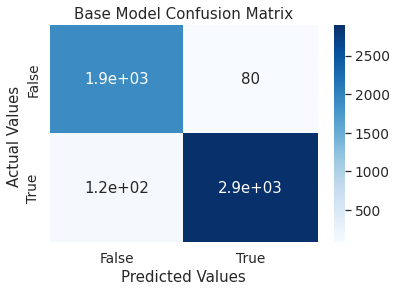

0.9731363331094695 0.9602385685884692


In [45]:
plot_confusion_matrix(cf_matrix1, "Base Model Confusion Matrix")
precision, recall = getMetric(cf_matrix1)
print(precision, recall)

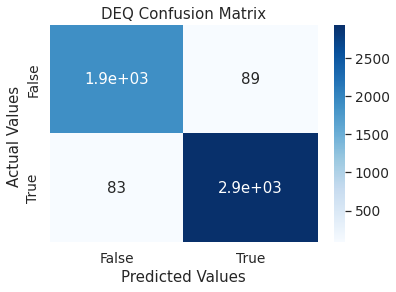

0.970568783068783 0.9724983432736912


In [46]:
plot_confusion_matrix(cf_matrix2, "DEQ Confusion Matrix")
precision, recall = getMetric(cf_matrix2)
print(precision, recall)